## PS2 Yuming Liu 

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
from scipy.optimize import root
import math
from IPython.display import Image
from scipy.special.orthogonal import p_roots

### Problem 2.1

In [2]:
def g(x):
    return 0.1*x**4 -1.5*x**3 + 0.53*x**2 + 2*x + 1

In [3]:
def error(f, a, b, n, method, intgvalue):
    if method not in {'midpoint','trapezoid', 'Simpsons'}:
        raise ValueError
    else:
        intg = 0
        if method == 'midpoint':
            for i in range(n):
                intg += ((b-a)/n)*f(a+((2*i+1)*(b-a))/(2*n))
        elif method == 'trapezoid':
            for i in range(1,n):
                intg+=((b-a)/(2*n))*(2*f(a+i*(b-a)/n))
            intg+=((b-a)/(2*n))*(f(a)+f(b))   
        else:
            for i in range(1,n):
                if i%2==1:
                    intg+=((b-a)/(3*n))*(4*f((a+((i*(b-a)))/n)))
                else:
                    intg+=((b-a)/(3*n))*(2*f((a+((i*(b-a))/n))))
            intg+=((b-a)/(3*n))*(f(a)+f(b)) 
    return np.abs(intgvalue - intg)

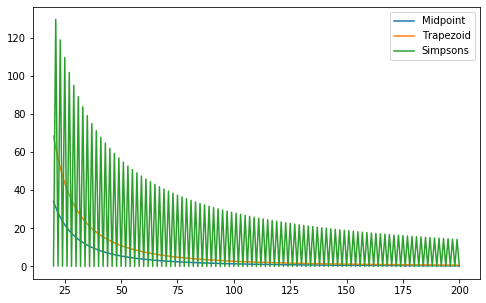

In [4]:
rr = np.arange(20, 201, 1)
plt.figure(figsize = (8,5))

def listerr(r, method):
    l = []
    for i in r:
        l.append(error(g, -10, 10, i, method, 4373+1/3))
    return l
plt.plot(rr, listerr(rr, 'midpoint'), label='Midpoint')
plt.plot(rr, listerr(rr, 'trapezoid'), label='Trapezoid')
plt.plot(rr, listerr(rr, 'Simpsons'), label='Simpsons')
plt.legend()
plt.show()

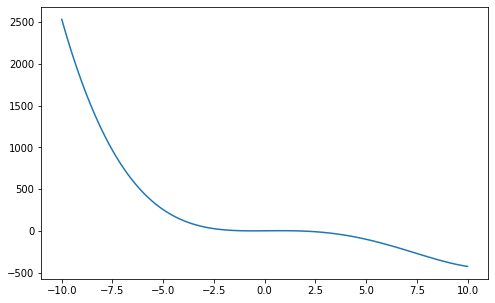

In [5]:
rr = np.linspace(-10, 10, 100)
plt.figure(figsize = (8,5))
plt.plot(rr, g(rr))

In [6]:
print('Using midpoint method, the difference with true value is: ', error(g, -10, 10, 200, 'midpoint', 4373+1/3))
print('Using trapezoid method, the difference with true value is: ', error(g, -10, 10, 200, 'trapezoid', 4373+1/3))
print('Using Simpsons method, the difference with true value is: ', error(g, -10, 10, 200, 'Simpsons', 4373+1/3))

Using midpoint method, the difference with true value is:  0.34216083333649294
Using trapezoid method, the difference with true value is:  0.6843266666628551
Using Simpsons method, the difference with true value is:  2.6666670237318613e-05


### Problem 2.2

In [7]:
def disc(N, mu, sigma, k):
    Z = np.linspace(mu - k * sigma, mu + k * sigma, N)
    weight = np.zeros(N)
    weight[0] = norm.cdf((Z[0]+Z[1])/2, loc=mu, scale=sigma)
    for i in range(1,N-1):
        f = lambda x : norm.pdf(x, loc=mu, scale=sigma)
        weight[i] = quad(f, (Z[i - 1] + Z[ i ]) / 2,(Z[i + 1] + Z[i])/2)[0]
    weight[-1] = 1 - norm.cdf((Z[-2] + Z[-1]) / 2, loc=mu, scale=sigma)
    return Z, weight
Z, weight = disc(11, 5, 1.5, 3)
df = pd.DataFrame({'Z': Z, 'Weight': weight})
df

,Z,Weight
0,0.5,0.003467
1,1.4,0.014397
2,2.3,0.048943
3,3.2,0.117253
4,4.1,0.198028
5,5.0,0.235823
6,5.9,0.198028
7,6.8,0.117253
8,7.7,0.048943
9,8.6,0.014397


### Problem 2.3

In [8]:
def log_disc(N, mu, sigma, k):
    Z, weight = disc(N, mu, sigma, k)
    A = np.exp(Z)
    apx = sum(A * weight)
    return A, weight, apx
A, weight, apx = log_disc(11, 5, 1.5, 3)
log_df = pd.DataFrame({'A': A, 'Weight': weight})
log_df

,A,Weight
0,1.648721,0.003467
1,4.055200,0.014397
2,9.974182,0.048943
3,24.532530,0.117253
4,60.340288,0.198028
5,148.413159,0.235823
6,365.037468,0.198028
7,897.847292,0.117253
8,2208.347992,0.048943
9,5431.659591,0.014397


In [9]:
print(apx)

460.5426522031043


### Problem 2.4

In [10]:
A, weight, apxn = log_disc(11, 10.5, 0.8, 3)
income= np.e**(10.5+0.5*(0.8**2))
diff = apxn - income
print(income, apxn, diff)

50011.08700852173 50352.456192765894 341.36918424416217


### Problem 3.1

In [11]:
def gauss(f,n,a,b):
    [x,w] = p_roots(n+1)
    G = 0.5*(b-a)*sum(w*f(0.5*(b-a)*x+0.5*(b+a)))
    return G

Gaussian = gauss(g, 3, -10, 10)
Sim = error(g, -10, 10, 200, 'Simpsons', 4373+1/3)
Mid = error(g, -10, 10, 200, 'midpoint', 4373+1/3)
Tra = error(g, -10, 10, 200, 'trapezoid', 4373+1/3)
print(Sim, Mid, Tra, np.abs(Gaussian - (4373+1/3)))

2.6666670237318613e-05 0.34216083333649294 0.6843266666628551 9.094947017729282e-13


Gaussian is more accurate than the Newton methods.

### Problem 3.2

In [12]:
Gaussian = sp.integrate.quad(g, -10, 10)
print(Gaussian)

(4373.333333333334, 8.109531705284936e-11)


The python Gaussian result has a greater absolute error than the error we had for problem 3.1.

### Problem 4.1

In [13]:
def f(x,y):
    if x**2+y**2 <= 1:
        return 1
    else:
        return 0
    
def Monte(f, Omega, N):
    x = np.random.uniform(Omega[0][0], Omega[0][1], N)
    y = np.random.uniform(Omega[1][0], Omega[1][1], N)
    
    t = 0
    for i in range(N):
        t += f(x[i],y[i])
    figure = (Omega[0][1]-Omega[0][0])*(Omega[1][1]-Omega[1][0])
    result = figure*t/N
    return result

In [14]:
np.random.seed(25)
N = 1
O = np.array([[-1,1],[-1,1]])
while round(Monte(f, O, N),4) != 3.1415:
    N += 1
print(N)    

615


### Problem 4.2

In [15]:
def isPrime(n):
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False

    return True

def primes_ascend(N, min_val=2):
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2

    return primes_vec

In [16]:
def element_seq(Name, n, d):
    primev = primes_ascend(d)
    if Name == 'Weyl':
        return [math.modf(i)[0] for i in n*np.sqrt(primev)]
        # Reference: https://www.geeksforgeeks.org/python-modf-function/
    elif Name == 'Haber':
        return [math.modf(i)[0] for i in (n * (n+1) / 2)*np.sqrt(primev)]
    elif Name == 'Niederreiter':
        exp = [i / (n+1) for i in range(1,d+1)]
        return [math.modf(i)[0] for i in n * np.power(2,exp)]
    elif Name == 'Baker':
        rational=[1 / i for i in range(1,d+1)]
        return [math.modf(i)[0] for i in n * np.exp(rational)]

In [17]:
element_seq('Weyl', 1073, 2)

[0.45115242633119124, 0.49051652140519764]

In [18]:
element_seq('Haber', 1073, 2)

[0.2688529398292303, 0.40737199457362294]

In [19]:
element_seq('Niederreiter', 1073, 2)

[0.6927253065300647, 0.38589783426255053]

In [20]:
element_seq('Baker', 1073, 2)

[0.716401936555485, 0.07792346123756033]

### Problem 4.3

In [21]:
def quasi_monte(f, Omega, Name, d, N):
    var = []
    for i in range(N):
        var.append(tuple(d * element_seq(Name, i ,d)[j] - 1 for j in range(d)))
    t = 0
    for i in range(N):
        t += f(var[i][0], var[i][1])
    area = (Omega[0][0] - Omega[0][1]) * (Omega[1][0] - Omega[1][1])
    return area * t / N

In [22]:
np.random.seed(25)
N = 1
O = np.array([[-1,1],[-1,1]])
while round(quasi_monte(f, O, 'Weyl', 2, N),4) != 3.1415:
    N += 1
print(N)    

1230


In [23]:
np.random.seed(25)
N = 1
O = np.array([[-1,1],[-1,1]])
while round(quasi_monte(f, O, 'Haber', 2, N),4) != 3.1415:
    N += 1
print(N)    

2064


In [24]:
'''
np.random.seed(25)
N = 1
O = np.array([[-1,1],[-1,1]])
while round(quasi_monte(f, O, 'Niederreiter', 2, N),4) != 3.1415:
    N += 1
print(N)    
'''

"\nnp.random.seed(25)\nN = 1\nO = np.array([[-1,1],[-1,1]])\nwhile round(quasi_monte(f, O, 'Niederreiter', 2, N),4) != 3.1415:\n    N += 1\nprint(N)    \n"

In [25]:
np.random.seed(25)
N = 1
O = np.array([[-1,1],[-1,1]])
while round(quasi_monte(f, O, 'Baker', 2, N),4) != 3.1415:
    N += 1
print(N) 

205


The Baker method has the smallest number of draws that is 205 times, and the Niederreiter method has the largest number.